# Building S-PLUS total mask

This notebook joins the masks for each band. Then, if you don't have it, please, run the other notebook first.

Besides, I create visual results for the mask here as well.

### Libraries

In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

### User inputs

In [2]:
field = 'STRIPE82-0113'#'HYDRA-0167'

Getting the original mask just for comparison

In [3]:
#Original mask
original_mask = np.load('results/'+field+'/original_mask-RGB_'+field+'.npz')
original_mask = original_mask['mask']

In [4]:
#Getting the percentage of area from the original image
p_original_mask = np.sum(original_mask)/(original_mask.shape[0]*original_mask.shape[1])
print(f'Percentage of area covered by the original mask is {100*p_original_mask:.2f} %')

Percentage of area covered by the original mask is 26.86 %


### Building the final mask: joining all the masks

Getting the masks:

In [5]:
fmask_R = np.load('results/'+field+'/'+field+'-finding_mask_R.npz')
fmask_G = np.load('results/'+field+'/'+field+'-finding_mask_G.npz')
fmask_I = np.load('results/'+field+'/'+field+'-finding_mask_I.npz')

smask_R = np.load('results/'+field+'/'+field+'-segmenting_mask_R.npz')
smask_G = np.load('results/'+field+'/'+field+'-segmenting_mask_G.npz')
smask_I = np.load('results/'+field+'/'+field+'-segmenting_mask_I.npz')

In [6]:
fmask_R = fmask_R['mask']
fmask_G = fmask_G['mask']
fmask_I = fmask_I['mask']

smask_R = smask_R['mask']
smask_G = smask_G['mask']
smask_I = smask_I['mask']

In [7]:
#Joining the masks
fmask = fmask_R*fmask_G*fmask_I
smask = smask_R*smask_G*smask_I

In [8]:
#Getting the percentage of area from the new masks
p_finding_mask = 1. - np.sum(fmask)/(fmask.shape[0]*fmask.shape[1])
p_segmenting_mask = 1. - np.sum(smask)/(smask.shape[0]*smask.shape[1])
print(f'Percentage of area covered by the original mask is {100*p_finding_mask:.2f} %')
print(f'Percentage of area covered by the original mask is {100*p_segmenting_mask:.2f} %')

Percentage of area covered by the original mask is 4.31 %
Percentage of area covered by the original mask is 2.90 %


In [9]:
#Saving the complete mask
np.savez('results/'+field+'/'+field+'-complete_finding_mask.npz', mask = fmask)
np.savez('results/'+field+'/'+field+'-complete_segmenting_mask.npz', mask = smask)

Looking closer: Finding mask - ZOOM (A)

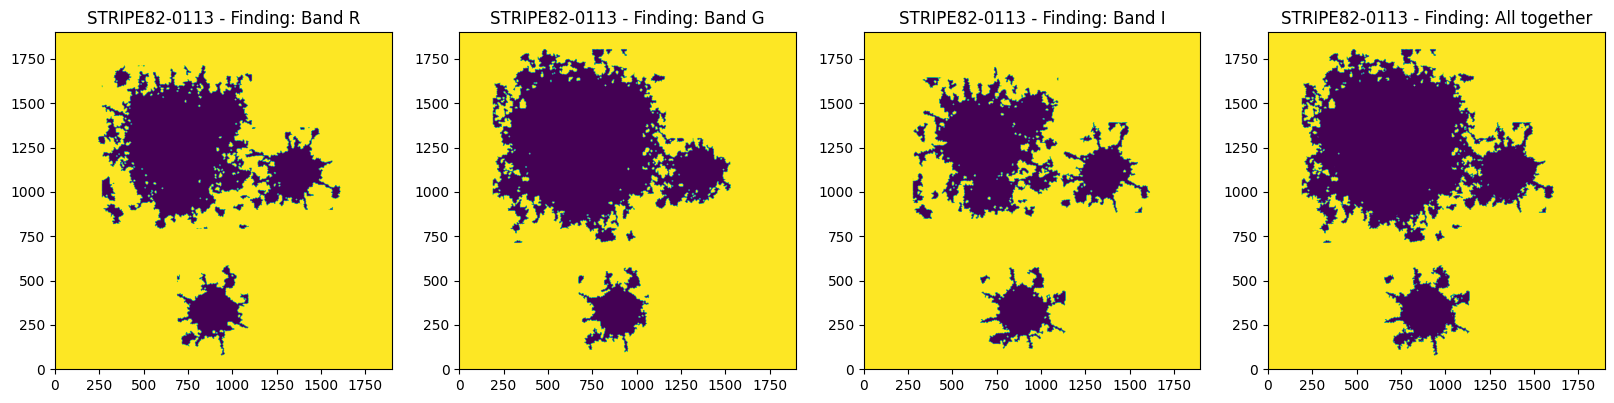

In [10]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(fmask_R[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding: Band R')
    plt.subplot(1,4,2)
    plt.imshow(fmask_G[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding: Band G')
    plt.subplot(1,4,3)
    plt.imshow(fmask_I[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding: Band I')
    plt.subplot(1,4,4)
    plt.imshow(fmask[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding: All together')
if field == 'HYDRA-0167':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(fmask_R[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Finding: Band R')
    plt.subplot(1,4,2)
    plt.imshow(fmask_G[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Finding: Band G')
    plt.subplot(1,4,3)
    plt.imshow(fmask_I[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Finding: Band I')
    plt.subplot(1,4,4)
    plt.imshow(fmask[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Finding: All together')
plt.savefig('results/'+field+'/'+field+'ZOOM_1-comparison-fmask-all_bands.png', bbox_inches='tight')    

Looking closer: Finding mask - ZOOM (B)

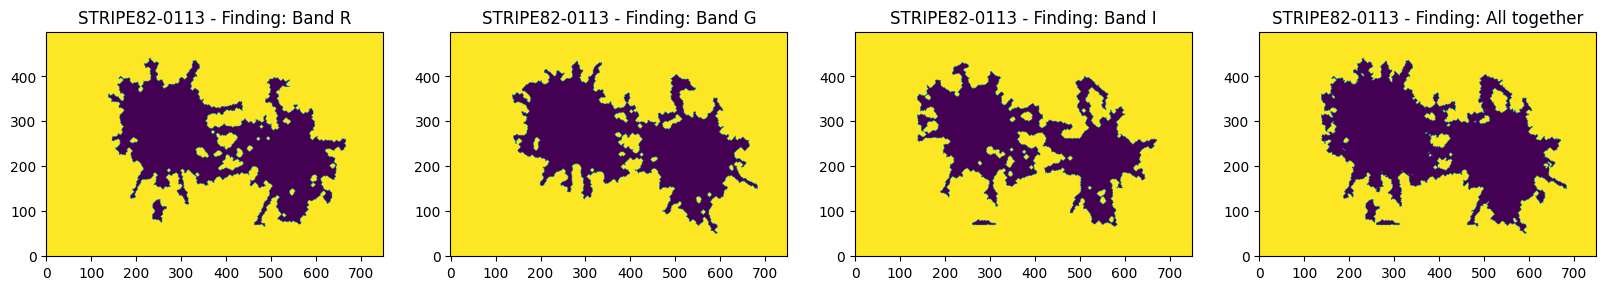

In [11]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(fmask_R[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding: Band R')
    plt.subplot(1,4,2)
    plt.imshow(fmask_G[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding: Band G')
    plt.subplot(1,4,3)
    plt.imshow(fmask_I[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding: Band I')
    plt.subplot(1,4,4)
    plt.imshow(fmask[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding: All together')
if field == 'HYDRA-0167':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(fmask_R[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding: Band R')
    plt.subplot(1,4,2)
    plt.imshow(fmask_G[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding: Band G')
    plt.subplot(1,4,3)
    plt.imshow(fmask_I[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding: Band I')
    plt.subplot(1,4,4)
    plt.imshow(fmask[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding: All together')
plt.savefig('results/'+field+'/'+field+'ZOOM_2-comparison-fmask-all_bands.png', bbox_inches='tight')

Looking closer: Segmenting mask - ZOOM (A)

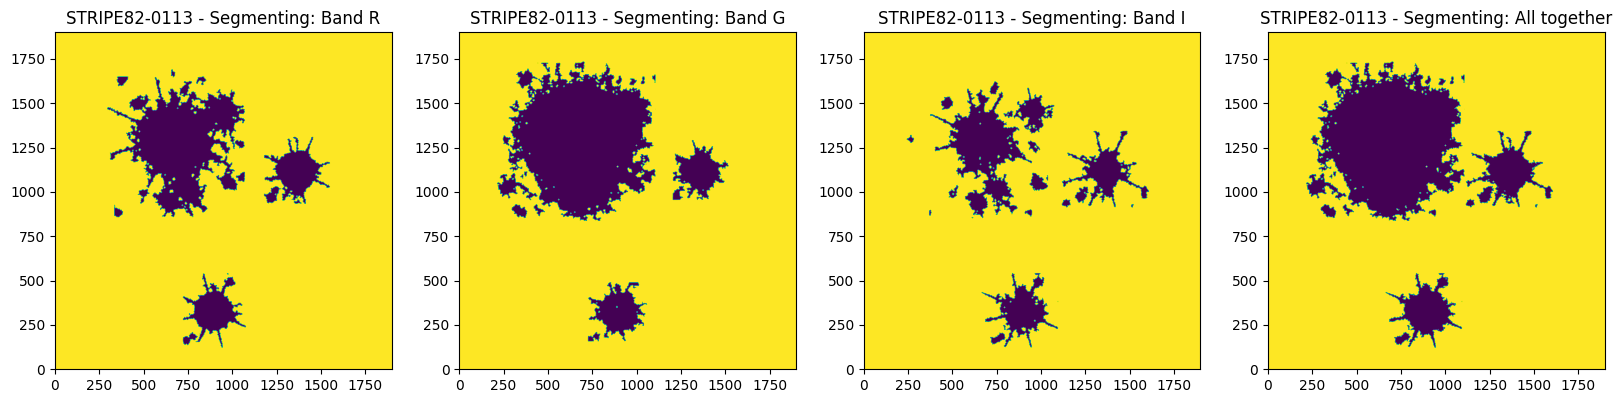

In [12]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(smask_R[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting: Band R')
    plt.subplot(1,4,2)
    plt.imshow(smask_G[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting: Band G')
    plt.subplot(1,4,3)
    plt.imshow(smask_I[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting: Band I')
    plt.subplot(1,4,4)
    plt.imshow(smask[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting: All together')
if field == 'HYDRA-0167':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(smask_R[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting: Band R')
    plt.subplot(1,4,2)
    plt.imshow(smask_G[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting: Band G')
    plt.subplot(1,4,3)
    plt.imshow(smask_I[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting: Band I')
    plt.subplot(1,4,4)
    plt.imshow(smask[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting: All together')
plt.savefig('results/'+field+'/'+field+'ZOOM_1-comparison-smask-all_bands.png', bbox_inches='tight')

Looking closer: Segmenting mask - ZOOM (B)

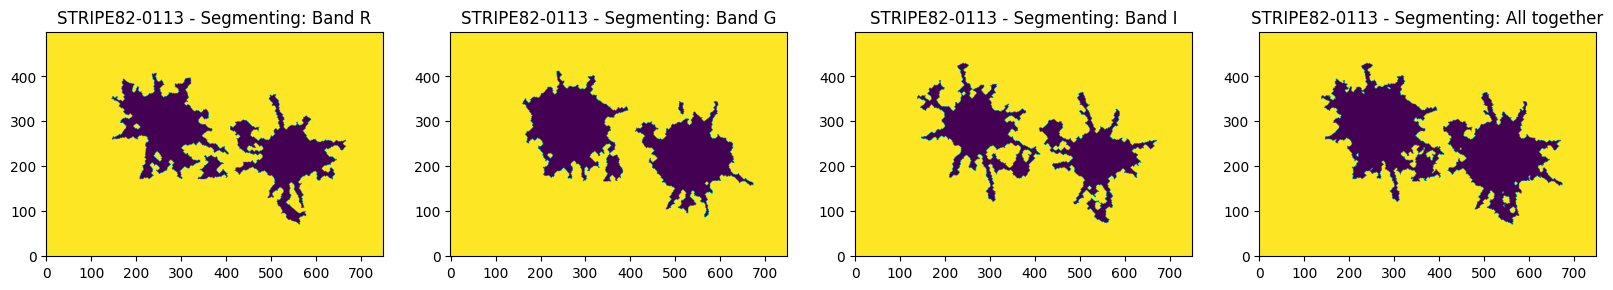

In [13]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(smask_R[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting: Band R')
    plt.subplot(1,4,2)
    plt.imshow(smask_G[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting: Band G')
    plt.subplot(1,4,3)
    plt.imshow(smask_I[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting: Band I')
    plt.subplot(1,4,4)
    plt.imshow(smask[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting: All together')
if field == 'HYDRA-0167':
    plt.figure(figsize = (20,10), dpi = 100)
    plt.subplot(1,4,1)
    plt.imshow(smask_R[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting: Band R')
    plt.subplot(1,4,2)
    plt.imshow(smask_G[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting: Band G')
    plt.subplot(1,4,3)
    plt.imshow(smask_I[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting: Band I')
    plt.subplot(1,4,4)
    plt.imshow(smask[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting: All together')
plt.savefig('results/'+field+'/'+field+'ZOOM_2-comparison-smask-all_bands.png', bbox_inches='tight')

In [14]:
#Percentage of the sky
p_fmask = (fmask.shape[0]*fmask.shape[1] - np.sum(fmask))/(fmask.shape[0]*fmask.shape[1])
p_smask = (smask.shape[0]*smask.shape[1] - np.sum(smask))/(smask.shape[0]*smask.shape[1])
p_original_mask, p_fmask, p_smask

print(f'Percentage of area covered by the original mask is {100*p_original_mask:.2f} % and percentage of the new masks are: {100*p_fmask:.2f} % (finding) and {100*p_smask:.2f} % (segmenting)')

Percentage of area covered by the original mask is 26.86 % and percentage of the new masks are: 4.31 % (finding) and 2.90 % (segmenting)


In [15]:
del fmask_R, fmask_G, fmask_I, smask_R, smask_G, smask_I

## Saving the masked images as FITS

In [16]:
aux = ['R', 'G', 'I']

In [17]:
#Taking the cropped info to save here
info = pd.read_csv('results/'+field+'/crop_RGB_info.csv')
c0 = info['c0']
c1 = info['c1']
min_0 = info['min_0']
max_0 = info['max_0']
min_1 = info['min_1']
max_1 = info['max_1']
size_c = {}
size = {}
for i in range(2):
    size_c[i] = info[f'size_c[{i}]']
    size[i] = info[f'size[{i}]']

In [18]:
#Original mask
original_mask = np.load('results/'+field+'/original_mask-RGB_'+field+'.npz')
original_mask = original_mask['mask']
aux_om = np.copy(original_mask)
aux_om[np.where(original_mask == 1)] = 0
aux_om[np.where(original_mask == 0)] = 1

In [19]:
#Padding the mask
color = [0, 0, 0]
top = int(min_0)
bottom = int(size[0] - max_0)
left = int(min_1)
right = int(size[1] - max_1)
omask_with_border = cv2.copyMakeBorder(aux_om, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)
fmask_with_border = cv2.copyMakeBorder(fmask, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)
smask_with_border = cv2.copyMakeBorder(smask, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)

In [20]:
#Saving the complete mask
np.savez('results/'+field+'/'+field+'-with_border_complete_finding_mask.npz', mask = fmask_with_border)
np.savez('results/'+field+'/'+field+'-with_border_complete_segmenting_mask.npz', mask = smask_with_border)

In [21]:
for i in range(len(aux)):
    image_file = get_pkg_data_filename('data/'+field+'/'+field+'_'+aux[i]+'.fits')
    hdu = fits.open(image_file)[0]
    
    #Saving the complete mask as FITS - for each band

    #original mask
    band_data = hdu.data*omask_with_border
    band_data[np.where(band_data == 0)] = -99.0
    bband = fits.PrimaryHDU(data = band_data, header = hdu.header)
    masked_filename = 'results/'+field+'/fits/'+field+'-original_masked-band_'+aux[i]+'.fits'
    bband.writeto(masked_filename, overwrite = True)    
    
    #fmask
    band_data = hdu.data*fmask_with_border
    band_data[np.where(band_data == 0)] = -99.0
    bband = fits.PrimaryHDU(data = band_data, header = hdu.header)
    masked_filename = 'results/'+field+'/fits/'+field+'-finding_masked-band_'+aux[i]+'.fits'
    bband.writeto(masked_filename, overwrite = True)

    #smask
    band_data = hdu.data*smask_with_border
    band_data[np.where(band_data == 0)] = -99.0
    bband = fits.PrimaryHDU(data = band_data, header = hdu.header)
    masked_filename = 'results/'+field+'/fits/'+field+'-segmenting_masked-band_'+aux[i]+'.fits'
    bband.writeto(masked_filename, overwrite = True)

In [22]:
del image_file, hdu, band_data, bband, masked_filename, omask_with_border, fmask_with_border, smask_with_border

#### Visual results

In [23]:
#Cropped RGB image
data = np.load('results/'+field+'/crop_RGB_'+field+'.npz')
data = data['img']

In [24]:
#Getting the positions of the bright objects
sat = pd.read_csv('results/'+field+'/cut_saturated-'+field+'.csv')
sat_x = sat['x'] 
sat_y = sat['y']

In [25]:
fmasked = np.zeros(data.shape)
fmasked[:, :, 0] = data[:, :, 0]*fmask
fmasked[:, :, 1] = data[:, :, 1]*fmask
fmasked[:, :, 2] = data[:, :, 2]*fmask

smasked = np.zeros(data.shape)
smasked[:, :, 0] = data[:, :, 0]*smask
smasked[:, :, 1] = data[:, :, 1]*smask
smasked[:, :, 2] = data[:, :, 2]*smask

In [26]:
fmasked = fmasked.astype(np.uint8)
smasked = smasked.astype(np.uint8)

### Comparison: Finding Mask

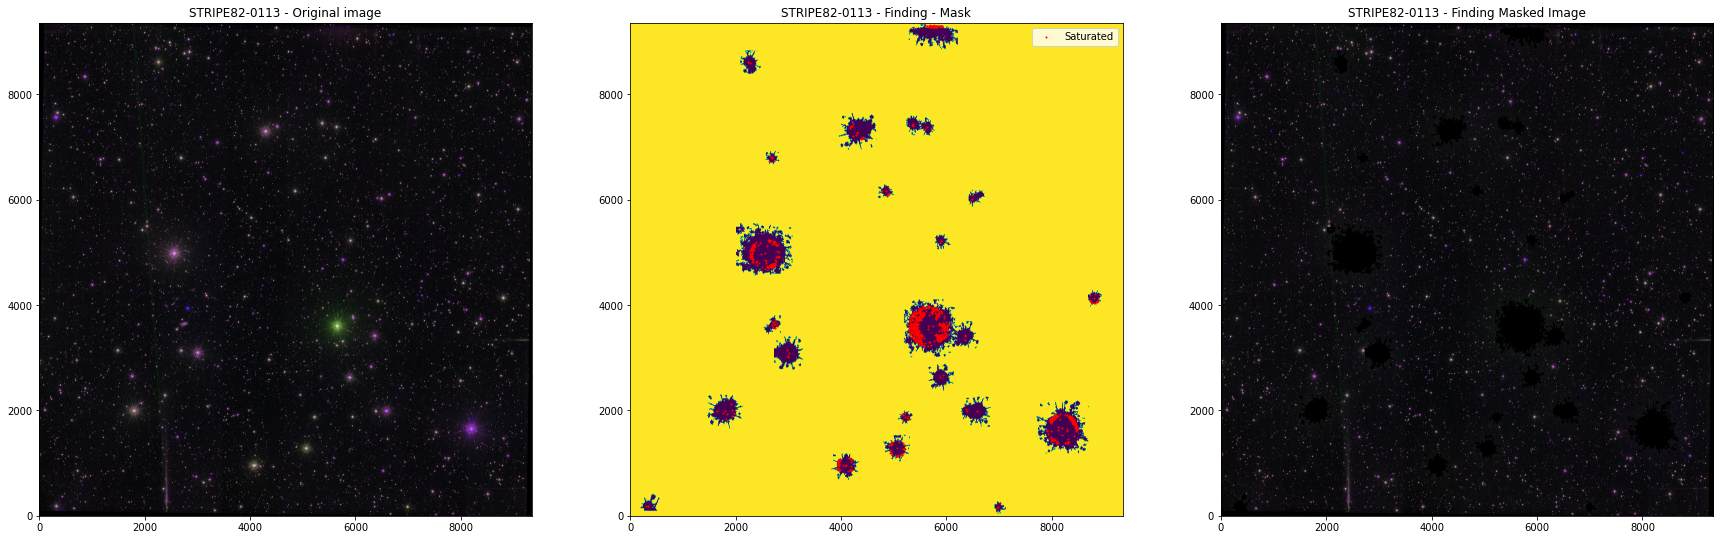

In [27]:
figure_size = 30
plt.figure(figsize=(figure_size,10))
plt.subplot(1,3,1)
plt.imshow(data, origin='lower')
plt.title(field+' - Original image')
plt.subplot(1,3,2)
plt.imshow(fmask, origin='lower')
plt.scatter(sat_x, sat_y, color = 'red', s = 1, label = 'Saturated')
plt.legend()
plt.title(field+' - Finding - Mask')
plt.subplot(1,3,3)
plt.imshow(fmasked, origin='lower')
plt.title(field+' - Finding Masked Image')
plt.savefig('results/'+field+'/'+field+'-finding-comparison.png', bbox_inches='tight')

### Comparison: Segmenting Mask

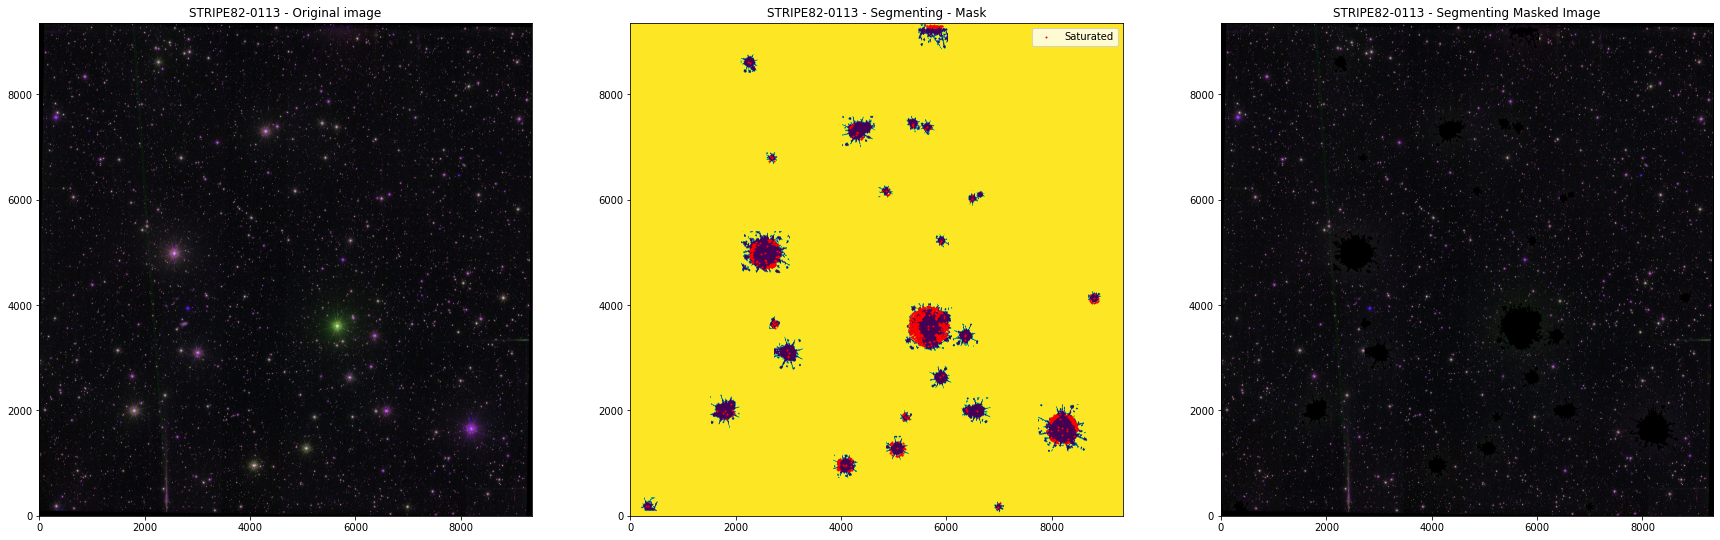

In [28]:
figure_size = 30
plt.figure(figsize=(figure_size,10))
plt.subplot(1,3,1)
plt.imshow(data, origin='lower')
plt.title(field+' - Original image')
plt.subplot(1,3,2)
plt.imshow(smask, origin='lower')
plt.scatter(sat_x, sat_y, color = 'red', s = 1, label = 'Saturated')
plt.legend()
plt.title(field+' - Segmenting - Mask')
plt.subplot(1,3,3)
plt.imshow(smasked, origin='lower')
plt.title(field+' - Segmenting Masked Image')
plt.savefig('results/'+field+'/'+field+'-segmenting-comparison.png', bbox_inches='tight')

### Comparison: Finding Mask - ZOOM 1

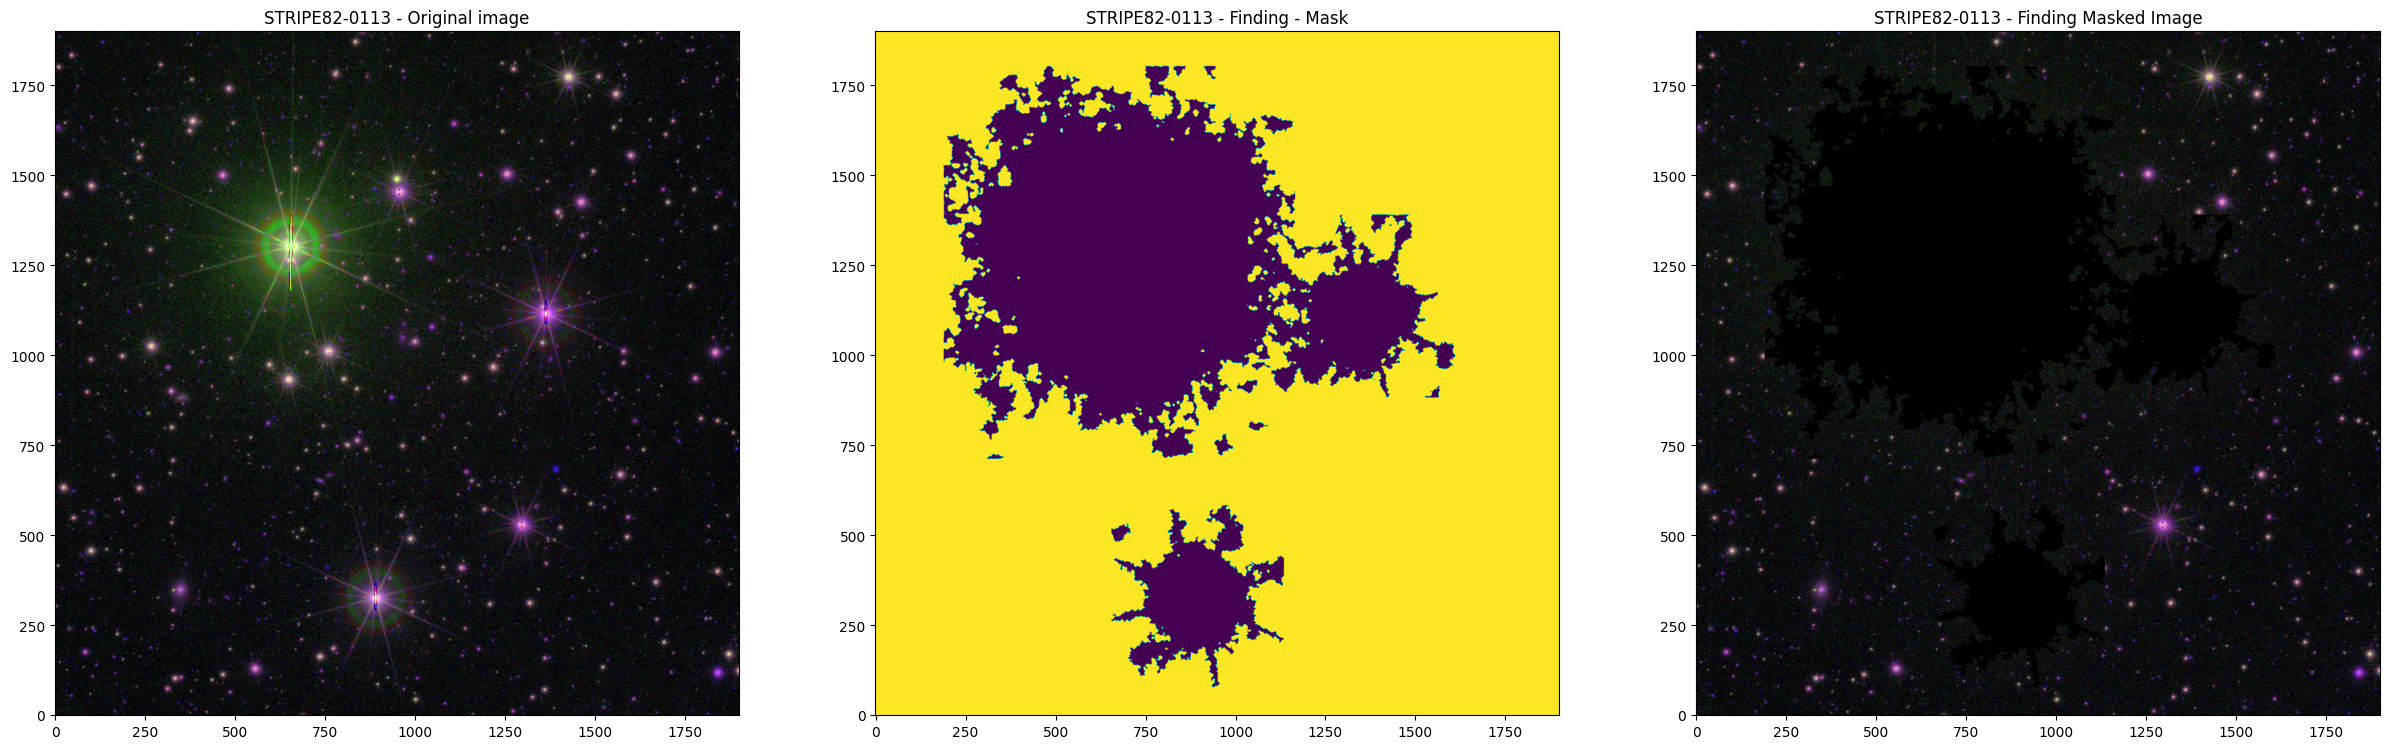

In [29]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(fmask[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding - Mask')
    plt.subplot(1,3,3)
    plt.imshow(fmasked[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Finding Masked Image')
if field == 'HYDRA-0167':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(fmask[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Finding - Mask')
    plt.subplot(1,3,3)
    plt.imshow(fmasked[2400:3100, 6800:7600], origin='lower')
plt.savefig('results/'+field+'/'+field+'-finding-comparison-ZOOM_1.png', bbox_inches='tight')

### Comparison: Segmenting Mask - ZOOM 1

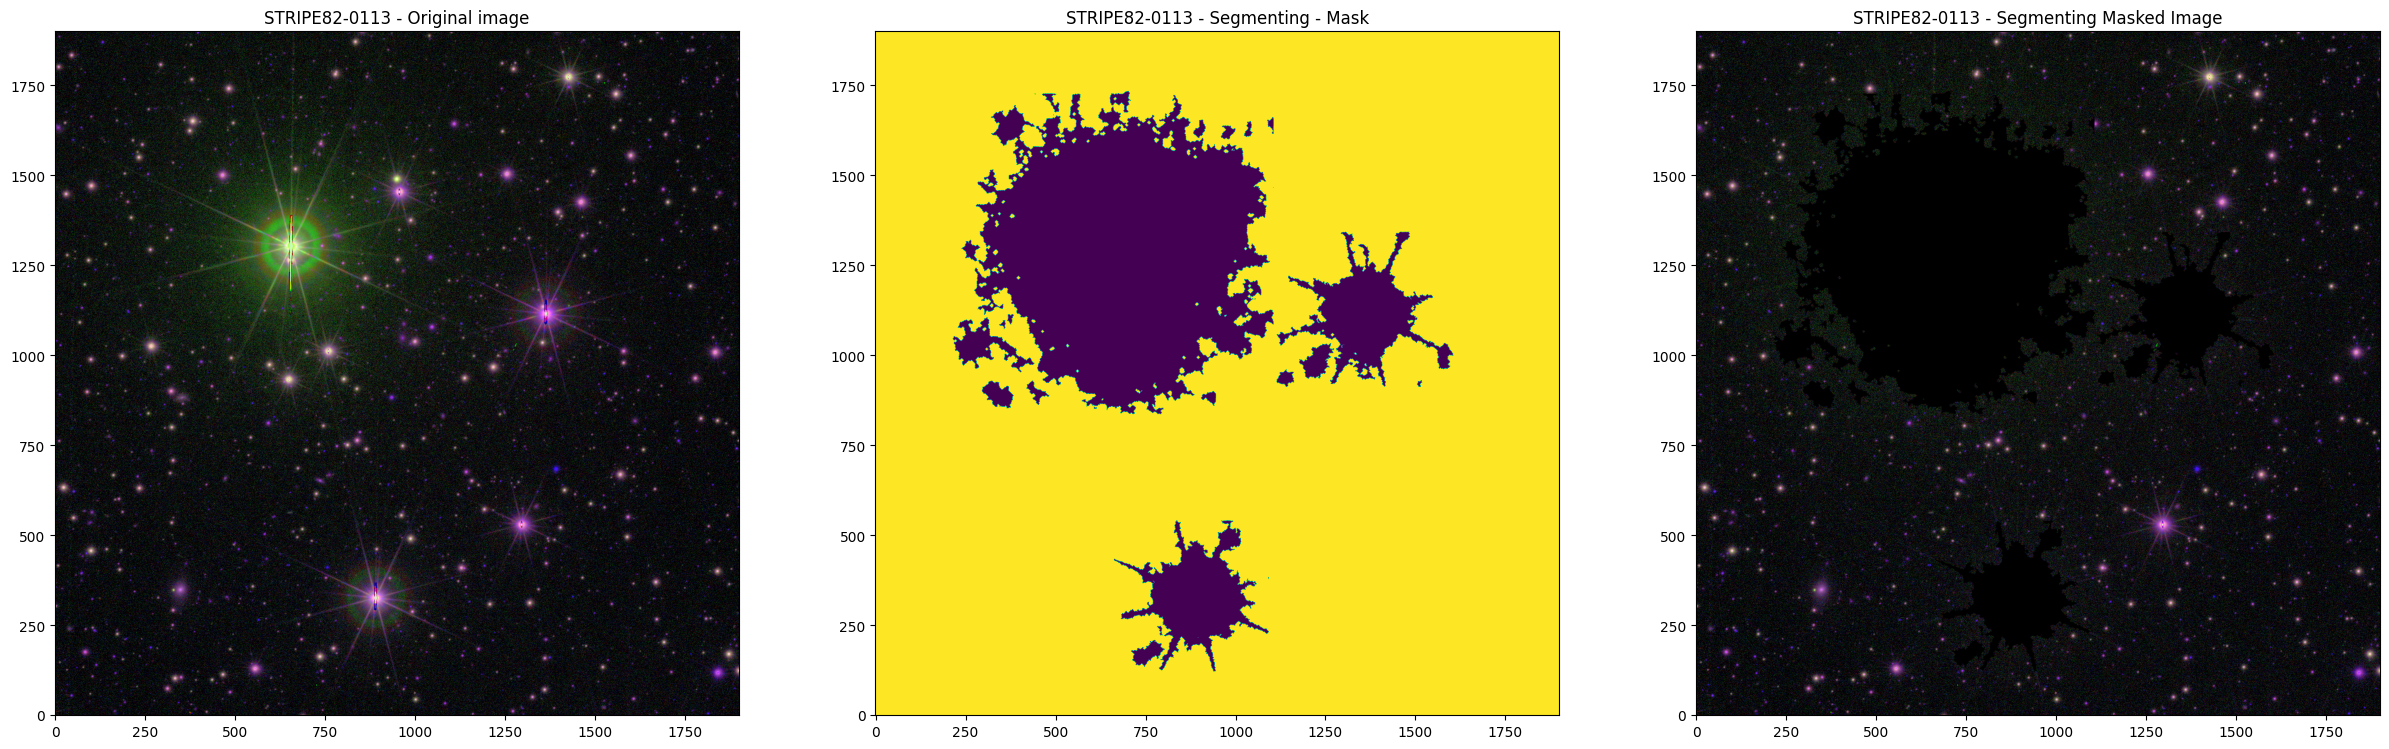

In [30]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(smask[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting - Mask')
    plt.subplot(1,3,3)
    plt.imshow(smasked[2300:4200, 5000:6900], origin='lower')
    plt.title(field+' - Segmenting Masked Image')
if field == 'HYDRA-0167':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(smask[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting - Mask')
    plt.subplot(1,3,3)
    plt.imshow(smasked[2400:3100, 6800:7600], origin='lower')
    plt.title(field+' - Segmenting Masked Image')
plt.savefig('results/'+field+'/'+field+'-segmenting-comparison-ZOOM_1.png', bbox_inches='tight')

### Comparison: Finding Mask - ZOOM 2

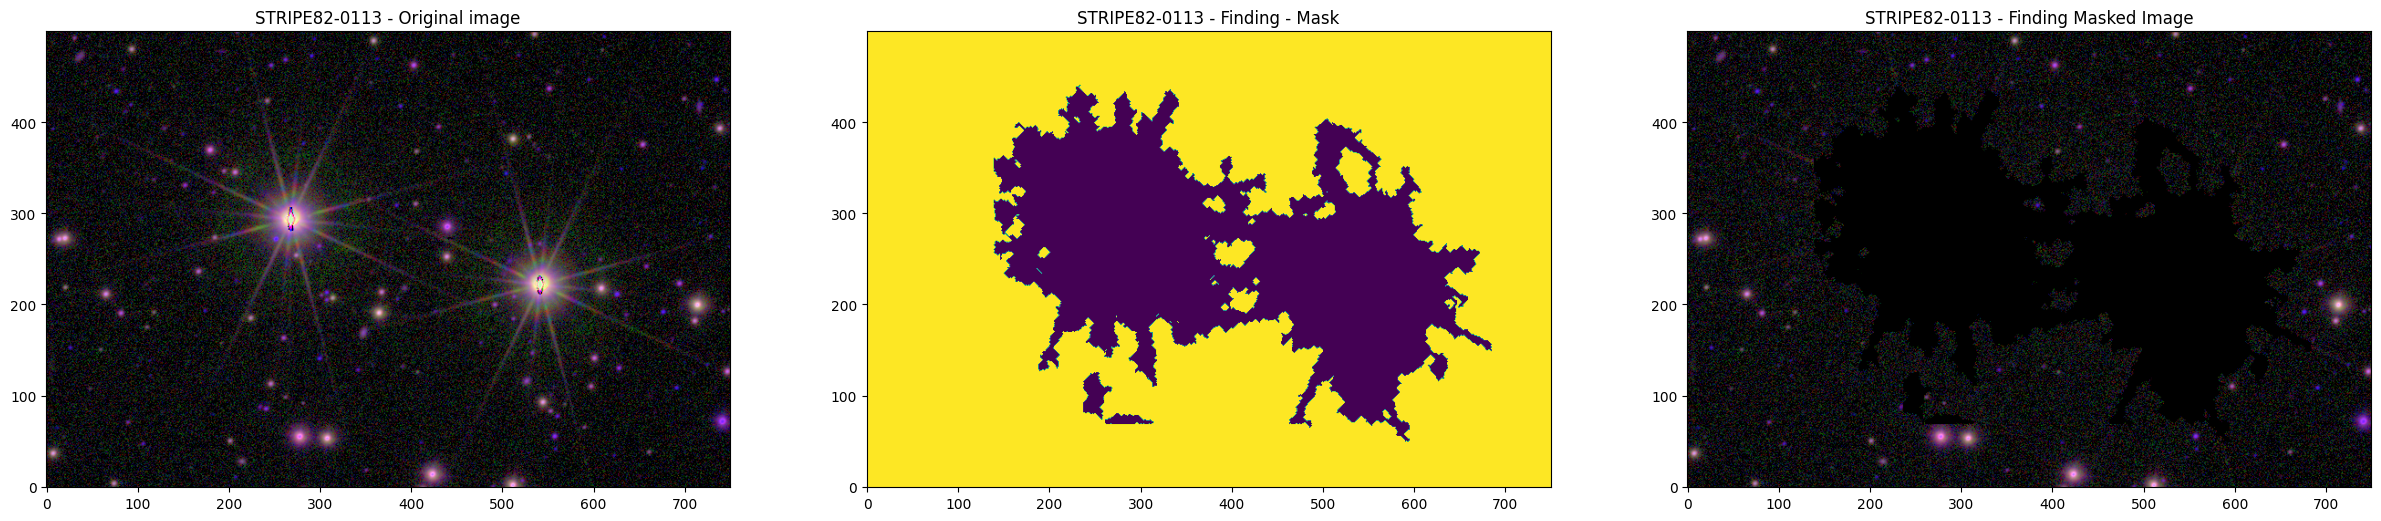

In [31]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(fmask[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding - Mask')
    plt.subplot(1,3,3)
    plt.imshow(fmasked[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Finding Masked Image')
if field == 'HYDRA-0167':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(fmask[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding - Mask')
    plt.subplot(1,3,3)
    plt.imshow(fmasked[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Finding Masked Image')
plt.savefig('results/'+field+'/'+field+'-finding-comparison-ZOOM_2.png', bbox_inches='tight')

### Comparison: Segmenting Mask - ZOOM 2

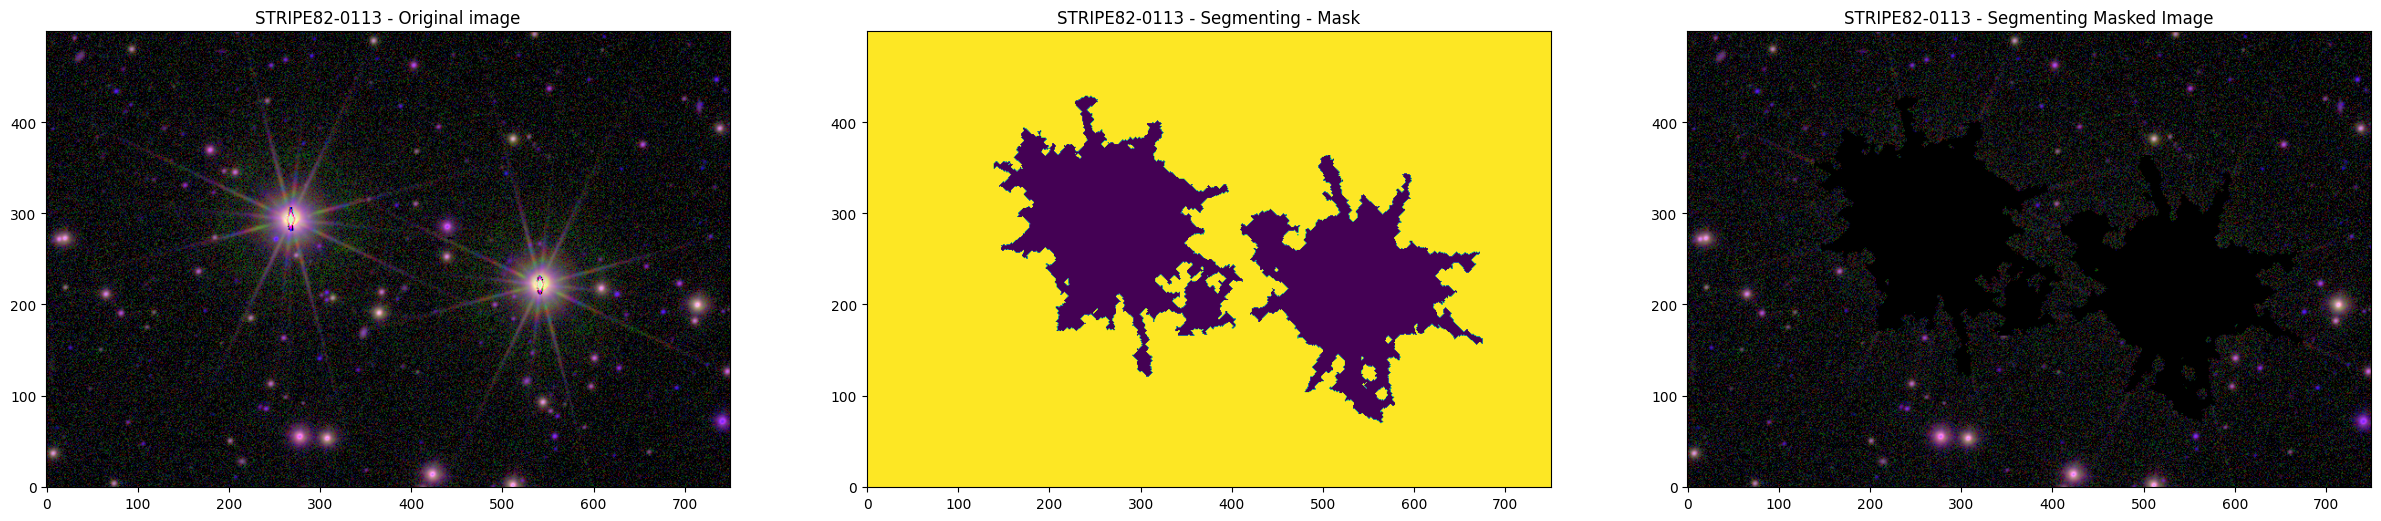

In [32]:
if field == 'STRIPE82-0113':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(smask[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting - Mask')
    plt.subplot(1,3,3)
    plt.imshow(smasked[7150:7650, 5100:5850], origin='lower')
    plt.title(field+' - Segmenting Masked Image')
if field == 'HYDRA-0167':
    plt.figure(figsize = (30, 10), dpi = 100)
    plt.subplot(1,3,1)
    plt.imshow(data[:,:,:][5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Original image')
    plt.subplot(1,3,2)
    plt.imshow(smask[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting - Mask')
    plt.subplot(1,3,3)
    plt.imshow(smasked[5200:5800, 7800:8700], origin='lower')
    plt.title(field+' - Segmenting Masked Image')
plt.savefig('results/'+field+'/'+field+'-segmenting-comparison-ZOOM_2.png', bbox_inches='tight')

In [33]:
del data, fmask, fmasked, smask, smasked